# Kaung Khant Lin
# 6540131
# 541

In [1]:
# Topic Modeling: LDA vs LSA Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

## Data

We will be using articles from NPR (National Public Radio), obtained from their website [www.npr.org](http://www.npr.org)

In [3]:
npr = pd.read_csv('npr.csv')

## Preprocessing

In [4]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [5]:
dtm = cv.fit_transform(npr['Article'])

## LSA

In [6]:
LSA = TruncatedSVD(n_components=4, random_state=42)

In [7]:
LSA.fit(dtm)

,n_components,4
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42
,tol,0.0


## Top Words Per Topic (LSA)

In [8]:
for index, topic in enumerate(LSA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['years', 'think', 'time', 'new', 'just', 'like', 'trump', 'said', 'people', 'says']


THE TOP 10 WORDS FOR TOPIC #1
['white', 'donald', 'republican', 'house', 'obama', 'campaign', 'president', 'clinton', 'said', 'trump']


THE TOP 10 WORDS FOR TOPIC #2
['house', 'administration', 'government', 'federal', 'percent', 'state', 'health', 'president', 'trump', 'says']


THE TOP 10 WORDS FOR TOPIC #3
['insurance', 'percent', 'federal', 'court', 'law', 'police', 'care', 'state', 'health', 'said']




## Visualizing Top Words Per Topic (LSA)

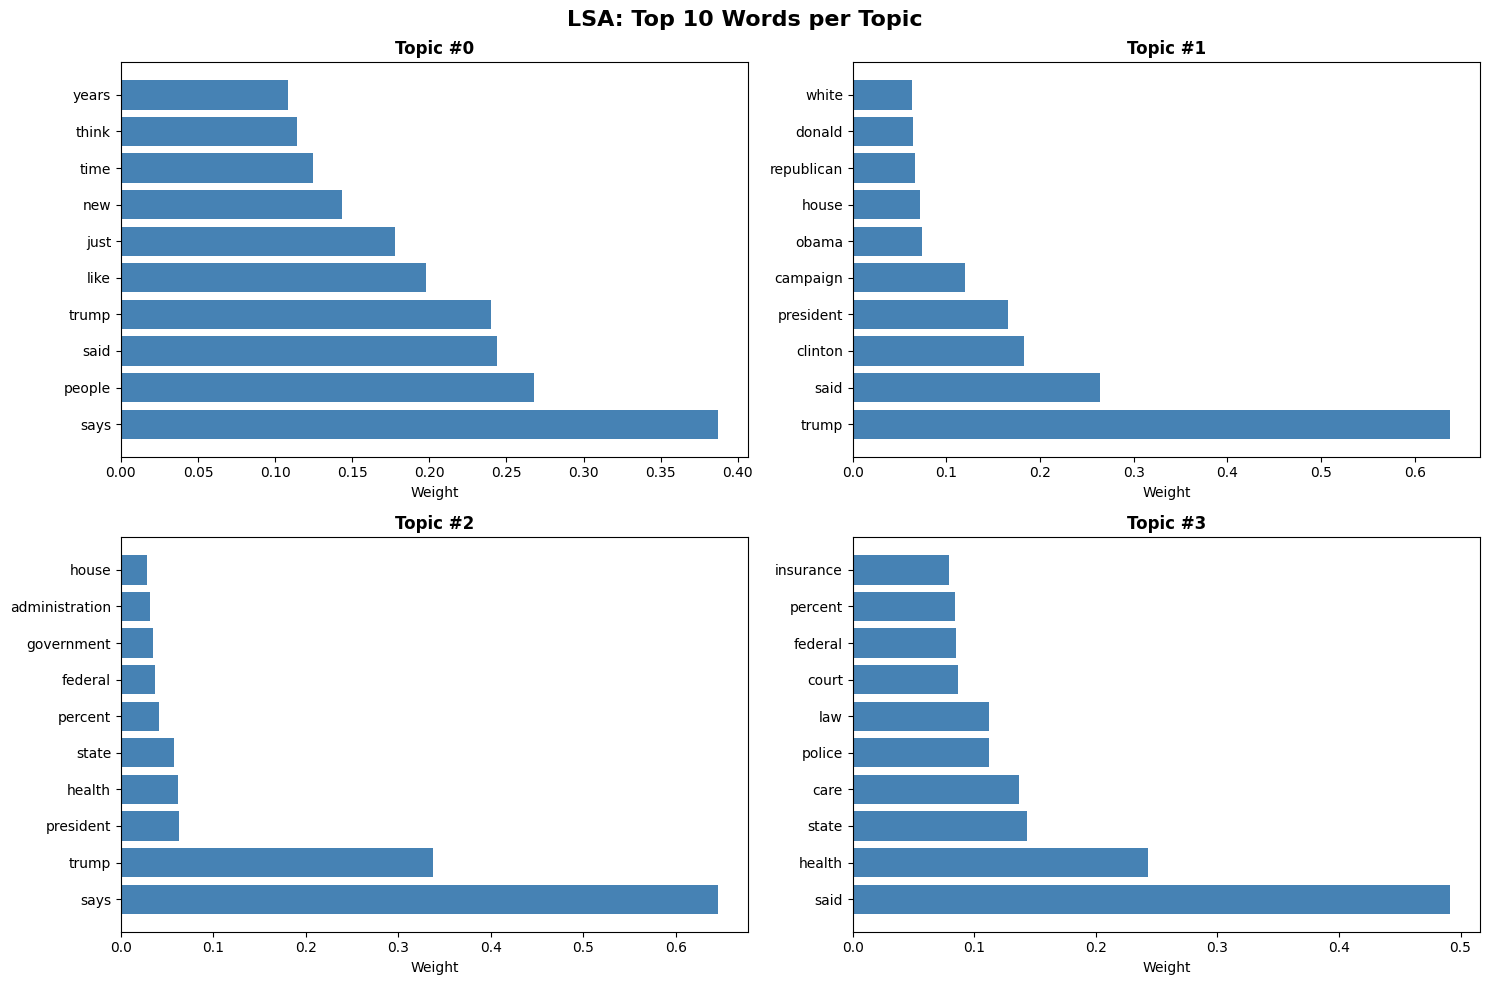

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('LSA: Top 10 Words per Topic', fontsize=16, fontweight='bold')

for index, topic in enumerate(LSA.components_):
    # Get top 10 word indices
    top_indices = topic.argsort()[-10:]
    top_words = [cv.get_feature_names_out()[i] for i in top_indices]
    top_values = topic[top_indices]
    
    # Determine subplot position
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    
    # Create bar chart
    ax.barh(range(len(top_words)), top_values, color='steelblue')
    ax.set_yticks(range(len(top_words)))
    ax.set_yticklabels(top_words)
    ax.set_xlabel('Weight', fontsize=10)
    ax.set_title(f'Topic #{index}', fontsize=12, fontweight='bold')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

## LDA (Latent Dirichlet Allocation)

## Visualizing Top Words Per Topic (LDA)

In [10]:
LDA = LatentDirichletAllocation(n_components=4, random_state=42)

## Top Words Per Topic (LDA)

In [11]:
LDA.fit(dtm)

,n_components,4
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [12]:
for index, topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['trump', 'federal', 'law', 'health', 'new', 'percent', 'state', 'people', 'said', 'says']


THE TOP 10 WORDS FOR TOPIC #1
['says', 'told', 'new', 'police', 'campaign', 'people', 'clinton', 'president', 'said', 'trump']


THE TOP 10 WORDS FOR TOPIC #2
['think', 'way', 'years', 'know', 'new', 'time', 'people', 'just', 'like', 'says']


THE TOP 10 WORDS FOR TOPIC #3
['study', 'new', 'children', 'school', 'women', 'just', 'health', 'like', 'people', 'says']




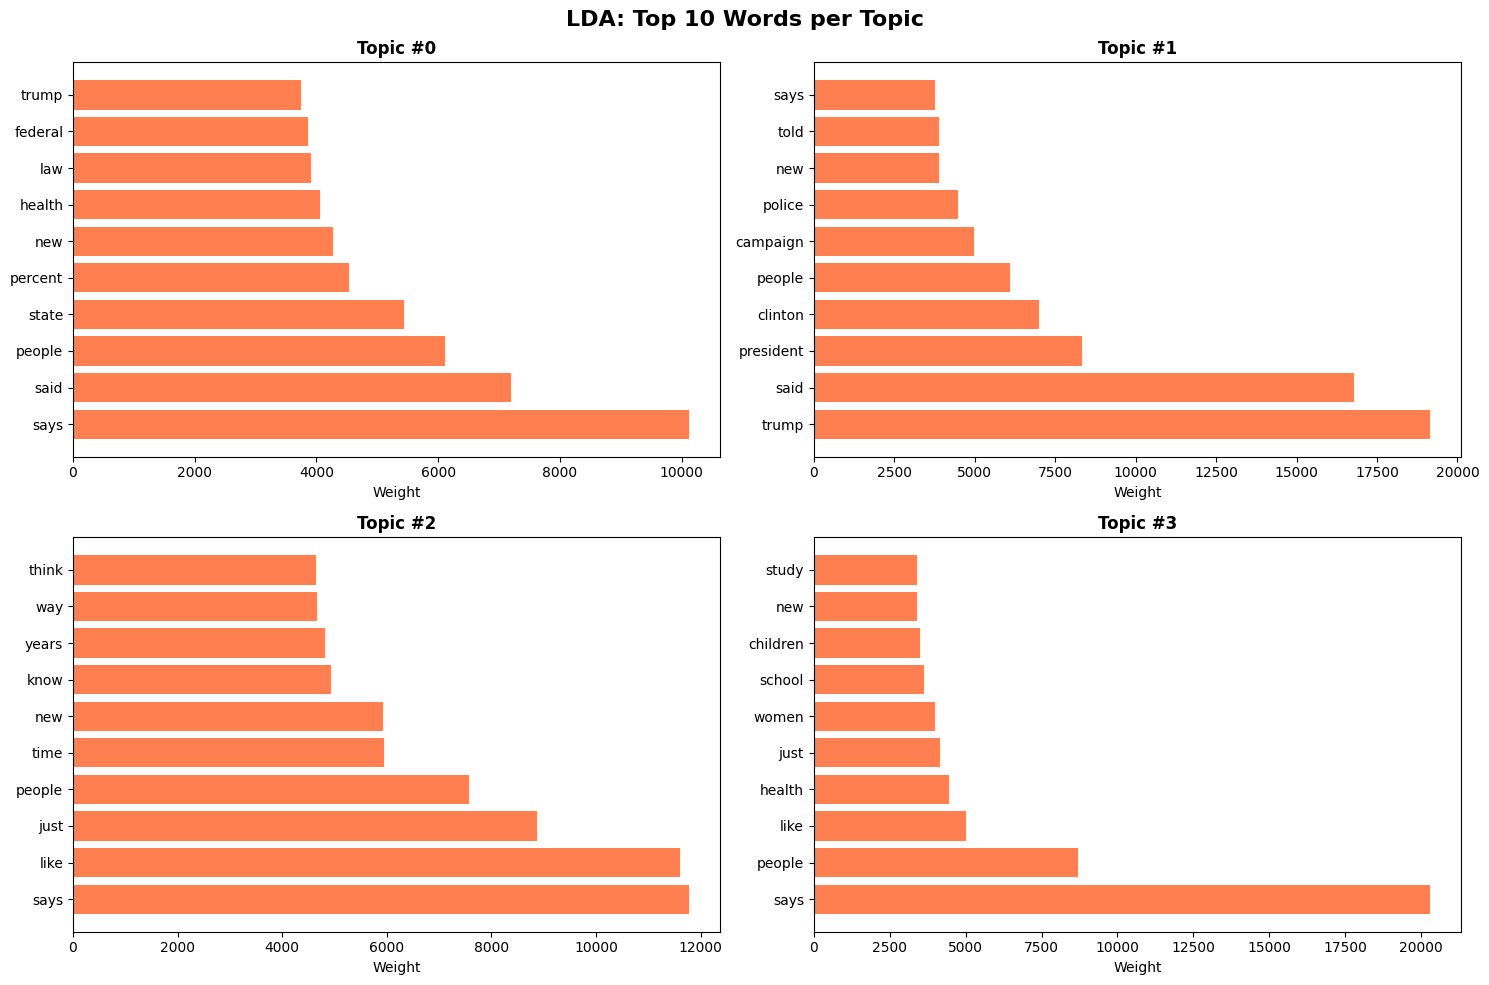

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('LDA: Top 10 Words per Topic', fontsize=16, fontweight='bold')

for index, topic in enumerate(LDA.components_):
    # Get top 10 word indices
    top_indices = topic.argsort()[-10:]
    top_words = [cv.get_feature_names_out()[i] for i in top_indices]
    top_values = topic[top_indices]
    
    # Determine subplot position
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    
    # Create bar chart
    ax.barh(range(len(top_words)), top_values, color='coral')
    ax.set_yticks(range(len(top_words)))
    ax.set_yticklabels(top_words)
    ax.set_xlabel('Weight', fontsize=10)
    ax.set_title(f'Topic #{index}', fontsize=12, fontweight='bold')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

## Model Comparison & Recommendation

**Comparing the Two Models:**

| Aspect | LSA | LDA |
|--------|-----|-----|
| **Speed** | Faster | Slower |
| **Topic Quality** | Moderate | Better |
| **Topic Clarity** | Mixed themes | Clearer themes |
| **Word Overlap** | High | Moderate |
| **Unique Topics** | No | Yes (opinion & social issues) |

**What I Noticed:**

**LSA's Problems:**
- Topic #0 doesn't really have a clear theme - it's too vague
- Words like 'trump', 'said', and 'says' show up in too many topics
- It can't tell the difference between opinion articles and regular news

**LDA's Strengths:**
- Topic #2 successfully identifies opinion/analysis articles with words like 'think', 'way', and 'know'
- Topic #3 clearly captures social issues and education with 'study', 'children', 'school', and 'women'
- It does a better job separating political news from government policy
- The topics are more useful for organizing content

**My Recommendation: Use LDA for this dataset**

**Why I chose LDA:**
1. LDA identifies different types of content better (news, opinion, social issues, politics)
2. The opinion topic and social/education topic would be really useful for organizing articles
3. These topics make more sense for how people would actually categorize these articles
4. Even though LDA is slower, the quality improvement is worth it

**Practical use:** If I was building a system to recommend articles or organize an archive, LDA would be much better because it can tell opinion pieces from news and identify social/education content.

## Optimal Number of Topics

### My Recommendation: **6 topics**

**Why 4 Topics Isn't Enough:**

Looking at the results, I can see some problems with using only 4 topics:

**LSA with 4 topics:**
- Topic #0 is too broad and not really useful
- Topics #1-3 mix together political, government, and legal/healthcare stuff
- Words like 'trump', 'said', and 'says' appear in all the topics

**LDA with 4 topics (better but still limited):**
- Topics #0 and #1 both have political/government content
- Healthcare shows up in both #0 and #3
- But at least we got opinion (#2) and social/education (#3) as separate topics, which is good

With 6 topics, we could separate things better:

1. **Politics & Elections**
   - Campaign, president, election, voters, republican, democrat

2. **Government & Federal Policy** 
   - Administration, federal, government, law, state

3. **Healthcare Policy**
   - Health, insurance, care, percent, medical, patients

4. **Legal & Justice**
   - Court, law, police, justice, rights, case

5. **Social Issues & Education**
   - Children, school, women, study, education, community

6. **Opinion & Analysis**
   - Think, way, know, believe, argue, perspective

**Final Answer:**

I think **6 topics would be best** for this NPR dataset because it gives us enough detail to separate different themes (politics, government, healthcare, legal, social issues, opinion) without making it too complicated to understand.